In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import geopandas as gpd
from pyprojroot import here
import numpy as np

%matplotlib inline

# up figure resolution
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 150

import warnings
warnings.filterwarnings('ignore')

In this notebooks, we will perfrorm some exploratory data analysis on Inside AirBnB's [Barcelona dataset](http://insideairbnb.com/barcelona/). The dataset contains seven files, each of which will be investigated in more detail.

- detailed
    - calendar
    - listings
    - reviews
- summary
    - listings
    - reviews
- geospatial
    - neighbourhoods.csv
    - neighbourhoods.geojson



In [2]:
%%time
listings_detailed = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/listings.csv.gz")

CPU times: user 1.88 s, sys: 483 ms, total: 2.36 s
Wall time: 11.7 s


In [129]:
price = listings_detailed.price.str[1:].replace("$", '')
price = price.str.replace(',', '')
listings_detailed.price = price.astype(float)
listings_detailed = listings_detailed[listings_detailed.price!=0]

listings_detailed['price_log'] = np.log(listings_detailed.price)

Index(['price', 'weekly_price', 'monthly_price', 'price_log'], dtype='object')

In [130]:
listings_detailed[listings_detailed.price_log == -np.inf]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_log


In [131]:
listings_detailed.price_log.describe()

count    20980.000000
mean         4.221513
std          0.894703
min          1.791759
25%          3.610918
50%          4.094345
75%          4.653960
max          9.615805
Name: price_log, dtype: float64

In [23]:
listings_detailed.shape

(20981, 106)

In [33]:
listings_detailed

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20200216165356,2020-02-16,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro “...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Tasa turistica a pagar a la llegada: 2.48 euro...,NaN,NaN,https://a0.muscache.com/im/pictures/13031453/4...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,99%,95%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,39.0,39.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",La Sagrada Família,la Sagrada Família,Eixample,Barcelona,CT,08025,Barcelona,"Barcelona, Spain",ES,Spain,41.404200,2.173060,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",NaN,$85.00,NaN,NaN,$150.00,$50.00,2,$30.00,1,1125,1,7,1125,1125,3.3,1125.0,today,t,21,26,44,258,2020-02-16,21,15,2013-05-27,2019-11-01,88.0,9.0,10.0,10.0,10.0,10.0,9.0,t,HUTB-002062,NaN,t,f,strict_14_with_grace_period,f,f,24,24,0,0,0.26
1,23197,https://www.airbnb.com/rooms/23197,20200216165356,2020-02-16,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,none,Strategically located in the area of Parc del ...,"As a Superhost, I aim to make your stay as com...","Tram T4 Campus Diagonal- Besos, over the ro...",You book the entire apartment for yourselves.,"Please do contact Tony, your check-in manager,...",I do not accept groups of young people under 2...,NaN,NaN,https://a0.muscache.com/im/pictures/738532/806...,NaN,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within an hour,100%,100%,t,https://a0.muscach

In [14]:
%%time
calendar_detailed = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/calendar.csv.gz")

CPU times: user 6.36 s, sys: 2.01 s, total: 8.37 s
Wall time: 21.3 s


In [24]:
calendar_detailed.shape

(7658211, 7)

In [29]:
%%time
reviews_detailed = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/reviews.csv.gz")

CPU times: user 6.15 s, sys: 2.03 s, total: 8.18 s
Wall time: 36.8 s


In [30]:
reviews_detailed.shape

(753366, 6)

In [16]:
%%time
listings_summary = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/listings.csv")

CPU times: user 1.77 s, sys: 1.17 s, total: 2.94 s
Wall time: 32.8 s


In [28]:
listings_summary.shape

(20981, 106)

In [17]:
%%time
reviews_summary = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/reviews.csv")

CPU times: user 5.2 s, sys: 3.65 s, total: 8.84 s
Wall time: 1min 8s


In [31]:
reviews_summary.shape

(753366, 6)

In [20]:
%%time
neighbourhoods_csv = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/visualisations/neighbourhoods.csv")

CPU times: user 5.23 ms, sys: 8.16 ms, total: 13.4 ms
Wall time: 281 ms


In [32]:
neighbourhoods_csv.shape

(73, 2)

In [21]:
%%time
neighbourhoods_json = gpd.read_file("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/visualisations/neighbourhoods.geojson")

CPU times: user 132 ms, sys: 48.5 ms, total: 181 ms
Wall time: 950 ms


(2.0436325, 2.2380575000000005, 41.3093897, 41.4758483)

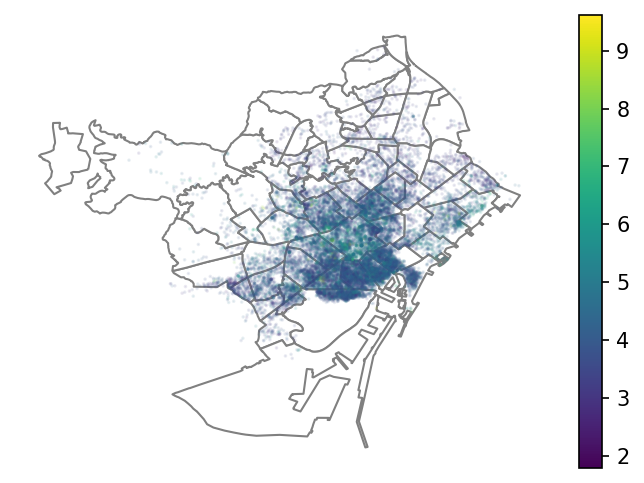

In [139]:
gdf = gpd.GeoDataFrame(listings_detailed, geometry=gpd.points_from_xy(listings_detailed.longitude, listings_detailed.latitude))
base = neighbourhoods_json.geometry.plot(color='white', edgecolor='.5', linewidth=1);
gdf.plot(marker='.', ax=base, alpha=0.1, column='price_log', legend=True, s=2);
plt.axis('off')

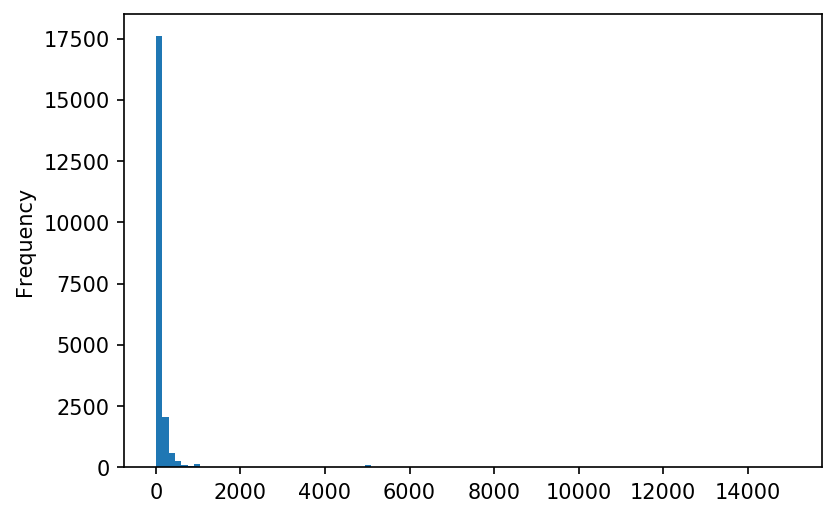

In [102]:
gdf.price.plot.hist(bins=100)

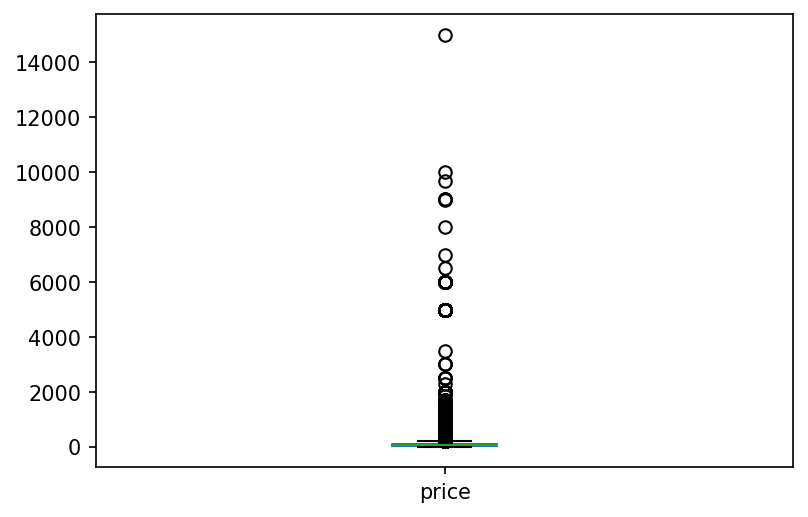

In [93]:
gdf.price.plot.box()

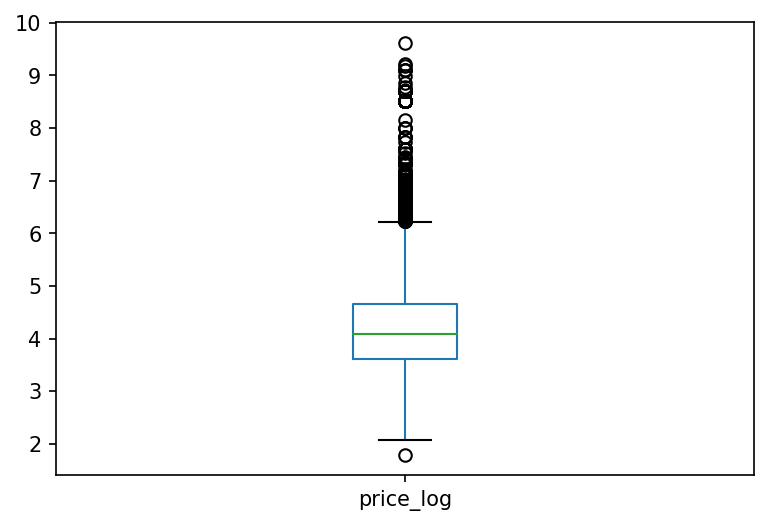

In [110]:
gdf.price_log.plot.box()